In [3]:
import numpy as np 
import pandas as pd 

# Load match and delivery datasets

In [5]:
match = pd.read_csv(r"E:\Jupyter Programs\BPL_dataset_1.csv")
delivery = pd.read_csv(r"E:\Jupyter Programs\BPL_deliveries_dataset_2.csv")

In [7]:
match.shape

(640, 17)

In [9]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Khulna Tigers,Rangpur Riders,1,1,Anamul Haque,Andre Russell,Jason Roy,0,...,0,0,0,0,6,1,7,Anamul Haque,hit wicket,NaN
1,1,1,Khulna Tigers,Rangpur Riders,1,2,Anamul Haque,Shahid Afridi,Mohammad Nabi,0,...,0,1,0,0,6,1,7,Anamul Haque,hit wicket,NaN
2,1,1,Khulna Tigers,Rangpur Riders,1,3,Andre Russell,Andre Russell,Mohammad Nabi,0,...,1,0,0,0,4,1,5,Andre Russell,run out,Shoaib Malik
3,1,1,Khulna Tigers,Rangpur Riders,1,4,Yasir Ali,Andre Russell,Benny Howell,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
4,1,1,Khulna Tigers,Rangpur Riders,1,5,Yasir Ali,Shahid Afridi,Mohammad Nabi,0,...,1,0,0,0,2,1,3,NaN,NaN,NaN


# Calculate total runs for each match in the 1st inning


In [11]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [13]:
total_score_df

,match_id,inning,total_runs
0,1,1,452
1,1,2,439
2,2,1,430
3,2,2,448
4,3,1,467
...,...,...,...
1435,718,2,447
1436,719,1,506
1437,719,2,465
1438,720,1,462


# Filter only 1st inning scores and merge with match dataframe


In [15]:
total_score_df = total_score_df[total_score_df['inning']==1]
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [18]:
match_df['team1'].unique()

array(['Khulna Tigers', 'Rangpur Riders', 'Barishal Bulls',
       'Sylhet Strikers', 'Rajshahi Kings', 'Dhaka Dominators',
       'Comilla Victorians', 'Chattogram Challengers'], dtype=object)

# Keep only selected teams


# Filter only valid teams (remove unknown/invalid entries)

In [20]:
teams =[
    'Khulna Tigers', 
    'Rangpur Riders', 
    'Barishal Bulls',
    'Sylhet Strikers', 
    'Rajshahi Kings', 
    'Dhaka Dominators',
    'Comilla Victorians', 
    'Chattogram Challengers']

match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [22]:
match_df.shape

(640, 19)

In [23]:
match_df['dl_applied'].value_counts()

dl_applied
0    640
Name: count, dtype: int64

# Keep only necessary columns and merge with delivery data

In [25]:
match_df = match_df[['match_id','city','winner','total_runs']]
delivery_df = match_df.merge(delivery,on='match_id')

# Keep only 2nd innings (chasing team) data


In [26]:
delivery_df = delivery_df[delivery_df['inning']==2]
delivery_df['city'].unique()

array(['Chattogram', 'Khulna', 'Barishal', 'Rangpur', 'Dhaka', 'Sylhet'],
      dtype=object)

In [27]:
delivery_df.shape

(76800, 24)

# Calculate current cumulative score per match

In [29]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

# Calculate runs left and balls left


In [31]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [33]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
120,1,Chattogram,Khulna Tigers,452,2,Khulna Tigers,Rangpur Riders,1,1,Anamul Haque,...,0,2,1,3,Anamul Haque,stumped,Benny Howell,3,449,119
121,1,Chattogram,Khulna Tigers,452,2,Khulna Tigers,Rangpur Riders,1,2,Anamul Haque,...,0,0,3,3,Anamul Haque,caught,Jason Roy,6,446,118
122,1,Chattogram,Khulna Tigers,452,2,Khulna Tigers,Rangpur Riders,1,3,Yasir Ali,...,0,3,2,5,Yasir Ali,caught,Benny Howell,11,441,117
123,1,Chattogram,Khulna Tigers,452,2,Khulna Tigers,Rangpur Riders,1,4,Shahid Afridi,...,0,2,2,4,Shahid Afridi,caught,Jason Roy,15,437,116
124,1,Chattogram,Khulna Tigers,452,2,Khulna Tigers,Rangpur Riders,1,5,Shahid Afridi,...,0,0,1,1,Shahid Afridi,lbw,NaN,16,436,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153595,640,Khulna,Chattogram Challengers,512,2,Khulna Tigers,Rajshahi Kings,20,2,Shahid Afridi,...,0,2,2,4,Shahid Afridi,caught,Kamrul Islam Rabbi,484,28,4
153596,640,Khulna,Chattogram Challengers,512,2,Khulna Tigers,Rajshahi Kings,20,3,Yasir Ali,...,0,6,0,6,NaN,retired hurt,NaN,490,22,3
153597,640,Khulna,Chattogram Challengers,512,2,Khulna Tigers,Rajshahi Kings,20,4,Anamul Haque,...,0,0,2,2,Anamul Haque,stumped,Kamrul Islam Rabbi,492,20,2
153598,640,Khulna,Chattogram Challengers,512,2,Khulna Tigers,Rajshahi Kings,20,5,Yasir Ali,...,0,1,1,2,Yasir Ali,lbw,NaN,494,18,1


# Calculate remaining wickets (starting from 10)

In [35]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x=="0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets'] = 10 - wickets
delivery_df.head(20)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
120,1,Chattogram,Khulna Tigers,452,2,Khulna Tigers,Rangpur Riders,1,1,Anamul Haque,...,2,1,3,1,stumped,Benny Howell,3,449,119,9
121,1,Chattogram,Khulna Tigers,452,2,Khulna Tigers,Rangpur Riders,1,2,Anamul Haque,...,0,3,3,1,caught,Jason Roy,6,446,118,8
122,1,Chattogram,Khulna Tigers,452,2,Khulna Tigers,Rangpur Riders,1,3,Yasir Ali,...,3,2,5,1,caught,Benny Howell,11,441,117,7
123,1,Chattogram,Khulna Tigers,452,2,Khulna Tigers,Rangpur Riders,1,4,Shahid Afridi,...,2,2,4,1,caught,Jason Roy,15,437,116,6
124,1,Chattogram,Khulna Tigers,452,2,Khulna Tigers,Rangpur Riders,1,5,Shahid Afridi,...,0,1,1,1,lbw,NaN,16,436,115,5
125,1,Chattogram,Khulna Tigers,452,2,Khulna Tigers,Rangpur Riders,1,6,Anamul Haque,...,4,0,4,1,lbw,NaN,20,432,114,4
126,1,Chattogram,Khulna Tigers,452,2,Khulna Tigers,Rangpur Riders,2,1,Yasir Ali,...,6,1,7,1,caught,Mohammad Nabi,27,425,113,3
127,1,Chattogram,Khulna Tigers,452,2,Khulna Tigers,Rangpur Riders,2,2,Andre Russell,...,3,2,5,1,stumped,Benny Howell,32,420,112,2
128,1,Chattogram,Khulna Tigers,452,2,Khulna Tigers,Rangpur Riders,2,3,Shahid Afridi,...,0,1,1,1,lbw,NaN,33,419,111,1
129,1,Chattogram,Khulna Tigers,452,2,Khulna Tigers,Rangpur Riders,2,4,Anamul Haque,...,4,1,5,1,stumped,Shoaib Malik,38,414,110,0


In [37]:
delivery_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
153595,640,Khulna,Chattogram Challengers,512,2,Khulna Tigers,Rajshahi Kings,20,2,Shahid Afridi,...,2,2,4,1,caught,Kamrul Islam Rabbi,484,28,4,-106
153596,640,Khulna,Chattogram Challengers,512,2,Khulna Tigers,Rajshahi Kings,20,3,Yasir Ali,...,6,0,6,1,retired hurt,NaN,490,22,3,-107
153597,640,Khulna,Chattogram Challengers,512,2,Khulna Tigers,Rajshahi Kings,20,4,Anamul Haque,...,0,2,2,1,stumped,Kamrul Islam Rabbi,492,20,2,-108
153598,640,Khulna,Chattogram Challengers,512,2,Khulna Tigers,Rajshahi Kings,20,5,Yasir Ali,...,1,1,2,1,lbw,NaN,494,18,1,-109
153599,640,Khulna,Chattogram Challengers,512,2,Khulna Tigers,Rajshahi Kings,20,6,Andre Russell,...,1,1,2,1,caught,Soumya Sarkar,496,16,0,-110


# Compute current run rate (CRR) and required run rate (RRR)

In [39]:
#crr(current run rate) = curren runs/ overs(balls)
#rrr(required run rate) = runs left / balls left 
delivery_df['crr'] = (delivery_df['current_score']*6) / (120 - delivery_df['balls_left'])
delivery_df['rrr'] = (delivery_df['runs_left']*6) / ( delivery_df['balls_left'])

# Create binary result column (1 if chasing team won, else 0)

In [41]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0
delivery_df['result'] = delivery_df.apply(result,axis=1)

# Final feature set for modeling

In [43]:
final_df =  delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]
final_df = final_df.sample(final_df.shape[0])

In [45]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
151399,Barishal Bulls,Rajshahi Kings,Barishal,237,40,-70,521,21.3,35.55,1


# Drop null values and filter invalid data

In [49]:
final_df.dropna(inplace=True)
final_df.isnull().sum()
final_df = final_df[final_df['balls_left']!=0]

In [51]:
x = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [55]:
x_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
19415,Dhaka Dominators,Barishal Bulls,Sylhet,74,24,-86,446,23.250000,18.500000
38357,Barishal Bulls,Chattogram Challengers,Rangpur,138,42,-68,473,25.769231,19.714286
66894,Dhaka Dominators,Sylhet Strikers,Rangpur,237,65,-45,434,21.490909,21.876923
35737,Chattogram Challengers,Comilla Victorians,Sylhet,99,22,-88,455,21.795918,27.000000
65913,Sylhet Strikers,Comilla Victorians,Khulna,305,86,-24,455,26.470588,21.279070
...,...,...,...,...,...,...,...,...,...
41183,Khulna Tigers,Rangpur Riders,Chattogram,339,96,-14,432,23.250000,21.187500
110772,Chattogram Challengers,Rangpur Riders,Rangpur,376,107,-3,430,24.923077,21.084112
76739,Sylhet Strikers,Barishal Bulls,Dhaka,260,60,-50,496,23.600000,26.000000
136033,Dhaka Dominators,Barishal Bulls,Sylhet,216,46,-64,468,20.432432,28.173913


# One-Hot Encoding on categorical features using ColumnTransformer

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trf = ColumnTransformer([('trf',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])],remainder='passthrough')

# Create and train a pipeline with Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline(steps=[
    ('step1',trf), 
    ('step2',LogisticRegression(solver='liblinear'))
])

pipe.fit(x_train,y_train)

C:\Users\Moynuddin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

# Evaluate accuracy on the test set

In [61]:
y_pred = pipe.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8648897058823529

In [63]:
pipe.predict_proba(x_test)[8]

array([0.84052302, 0.15947698])

# Track match progression after every over

In [65]:
import numpy as np
def match_progression(x_df, match_id, pipe): 
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr']]
    temp_df = temp_df[temp_df['balls_left'] != 0]

    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0] * 100, 1)
    temp_df['win'] = np.round(result.T[1] * 100, 1)
    temp_df['end_of_over'] = range(1, temp_df.shape[0] + 1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)

    # Calculate wickets fallen in each over
    wickets = list(temp_df['wickets'].values)
    #modify wickets
    new_wickets = wickets[:]  
    new_wickets.insert(0, 10)  

    wickets.append(0)  
    wickets = np.array(wickets) 
    nw = np.array(new_wickets)   
    temp_df['wickets_in_over'] = (nw - wickets)[:temp_df.shape[0]]
    print("Target-", target)
    temp_df = temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over', 'lose', 'win']]
    return temp_df, target

# Function call for a specific match

In [67]:
temp_df, target = match_progression(delivery_df, 1, pipe)

Target- 452


In [69]:
temp_df

,end_of_over,runs_after_over,wickets_in_over,lose,win
125,1,20,6,85.0,15.0
131,2,28,6,84.1,15.9
137,3,17,6,84.6,15.4
143,4,19,6,84.7,15.3
149,5,35,6,84.2,15.8
155,6,19,6,84.4,15.6
161,7,27,6,84.3,15.7
167,8,26,6,84.2,15.8
173,9,17,6,84.4,15.6
179,10,22,6,84.4,15.6


# Visualize match progression using matplotlib

Text(0.5, 1.0, 'Target-452')

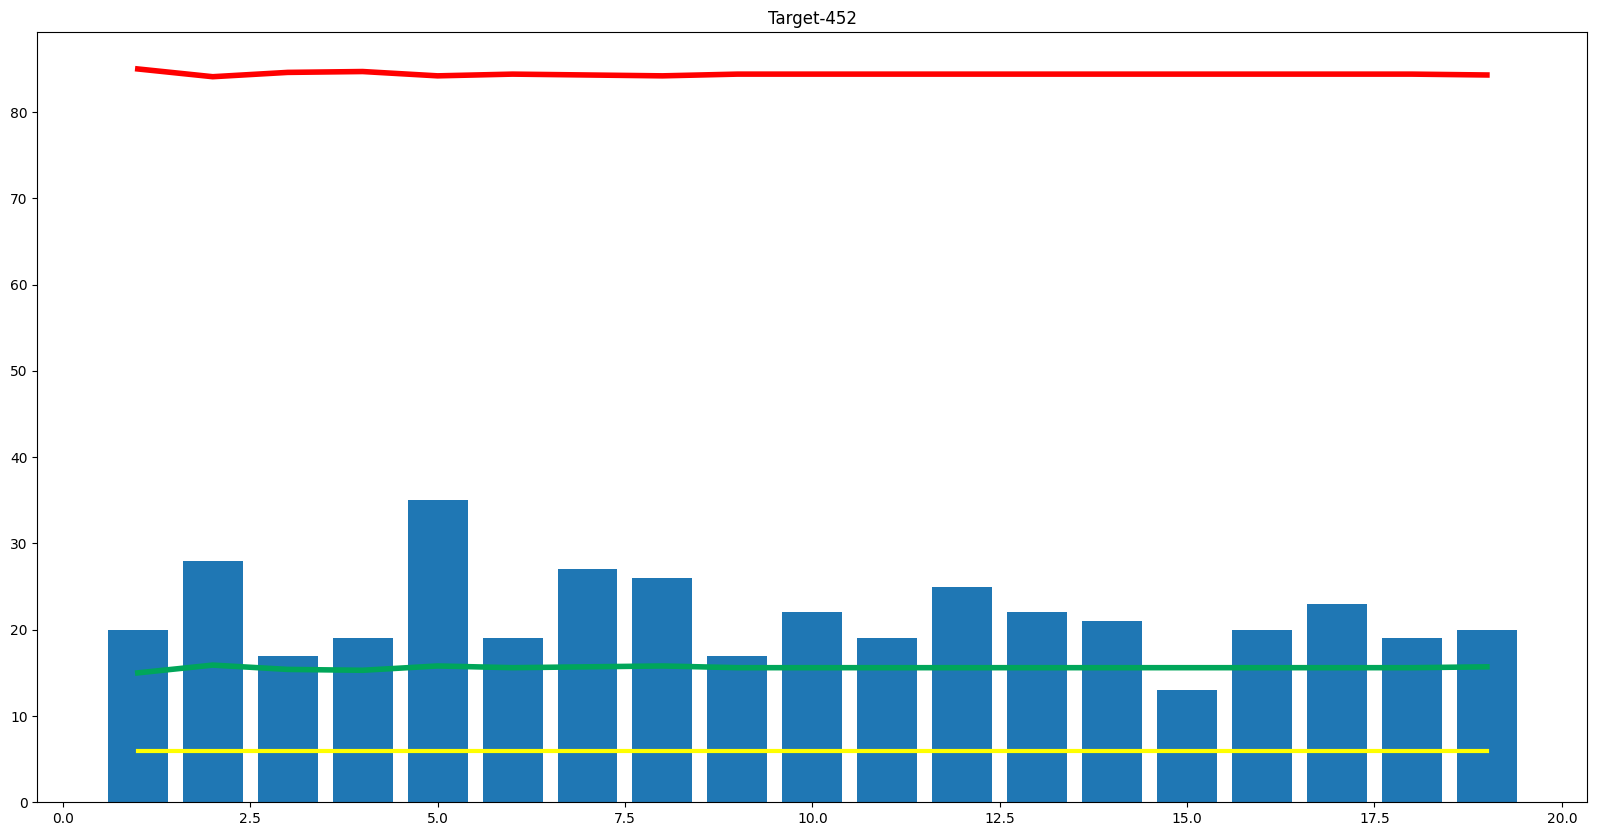

In [71]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,10))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [73]:
delivery_df['city'].unique()

array(['Chattogram', 'Khulna', 'Barishal', 'Rangpur', 'Dhaka', 'Sylhet'],
      dtype=object)

# Save trained pipeline using pickle

In [78]:
import joblib
joblib.dump(pipe, "model_pipeline.pkl")

['model_pipeline.pkl']

In [77]:
teams

['Khulna Tigers',
 'Rangpur Riders',
 'Barishal Bulls',
 'Sylhet Strikers',
 'Rajshahi Kings',
 'Dhaka Dominators',
 'Comilla Victorians',
 'Chattogram Challengers']